In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
weather_yield_table = pd.read_csv("final_cleaned_data/weather_yield_table.csv")
soil_yield_table = pd.read_csv("final_cleaned_data/soil_yield_table.csv")

## Modeling

In [4]:
print(weather_yield_table.shape)
print(soil_yield_table.shape)

(1677, 81)
(92, 57)


In [5]:
for col in weather_yield_table.columns:
    print(col)

Unnamed: 0
Year
County
DP10_4
DP10_5
DP10_6
DP10_7
DP10_8
DP10_9
DP10_10
DT00_4
DT00_5
DT00_6
DT00_7
DT00_8
DT00_9
DT00_10
DT32_4
DT32_5
DT32_6
DT32_7
DT32_8
DT32_9
DT32_10
DX32_4
DX32_5
DX32_6
DX32_7
DX32_8
DX32_9
DX32_10
DX90_4
DX90_5
DX90_6
DX90_7
DX90_8
DX90_9
DX90_10
EMSD_4
EMSD_5
EMSD_6
EMSD_7
EMSD_8
EMSD_9
EMSD_10
EMXP_4
EMXP_5
EMXP_6
EMXP_7
EMXP_8
EMXP_9
EMXP_10
EMXT_4
EMXT_5
EMXT_6
EMXT_7
EMXT_8
EMXT_9
EMXT_10
PRCP_4
PRCP_5
PRCP_6
PRCP_7
PRCP_8
PRCP_9
PRCP_10
SNOW_4
SNOW_5
SNOW_6
SNOW_7
SNOW_8
SNOW_9
SNOW_10
TAVG_4
TAVG_5
TAVG_6
TAVG_7
TAVG_8
TAVG_9
TAVG_10
Value


In [6]:
'''
Description of columns in weather_yield table:

Year
County
DP10_4 - Number of days with >= 0.1 inch/2.54 millimeters in April
DP10_5 - Number of days with >= 0.1 inch/2.54 millimeters in May
DP10_6 - Number of days with >= 0.1 inch/2.54 millimeters in June
DP10_7 - Number of days with >= 0.1 inch/2.54 millimeters in July
DP10_8 - Number of days with >= 0.1 inch/2.54 millimeters in August
DP10_9 - Number of days with >= 0.1 inch/2.54 millimeters in September
DP10_10 - Number of days with >= 0.1 inch/2.54 millimeters in October
DT00_4 - Number of days with maximum temperature <= -17.8 degrees Celsius in April
DT00_5 - Number of days with maximum temperature <= -17.8 degrees Celsius in May
DT00_6 - Number of days with maximum temperature <= -17.8 degrees Celsius in June
DT00_7 - Number of days with maximum temperature <= -17.8 degrees Celsius in July
DT00_8 - Number of days with maximum temperature <= -17.8 degrees Celsius in August
DT00_9 - Number of days with maximum temperature <= -17.8 degrees Celsius in September
DT00_10 - Number of days with maximum temperature <= -17.8 degrees Celsius in October
DT32_4 - Number of days with minimum temperature <= 0 degrees Celsius in April
DT32_5 - Number of days with minimum temperature <= 0 degrees Celsius in May
DT32_6 - Number of days with minimum temperature <= 0 degrees Celsius in June
DT32_7 - Number of days with minimum temperature <= 0 degrees Celsius in July
DT32_8 - Number of days with minimum temperature <= 0 degrees Celsius in August
DT32_9 - Number of days with minimum temperature <= 0 degrees Celsius in September
DT32_10 - Number of days with minimum temperature <= 0 degrees Celsius in October
DX32_4 - Number of days with maximum temperature <= 0 degrees Celsius in April
DX32_5 - Number of days with maximum temperature <= 0 degrees Celsius in May
DX32_6 - Number of days with maximum temperature <= 0 degrees Celsius in June
DX32_7 - Number of days with maximum temperature <= 0 degrees Celsius in July
DX32_8 - Number of days with maximum temperature <= 0 degrees Celsius in August
DX32_9 - Number of days with maximum temperature <= 0 degrees Celsius in September
DX32_10 - Number of days with maximum temperature <= 0 degrees Celsius in October
DX90_4 - Number of days with maximum temperature >= 32.2 degrees Celsius in April
DX90_5 - Number of days with maximum temperature >= 32.2 degrees Celsius in May
DX90_6 - Number of days with maximum temperature >= 32.2 degrees Celsius in June
DX90_7 - Number of days with maximum temperature >= 32.2 degrees Celsius in July
DX90_8 - Number of days with maximum temperature >= 32.2 degrees Celsius in August
DX90_9 - Number of days with maximum temperature >= 32.2 degrees Celsius in Septmber
DX90_10 - Number of days with maximum temperature >= 32.2 degrees Celsius in October
EMSD_4 -  Highest daily snow depth in April (mm)
EMSD_5 -  Highest daily snow depth in May (mm)
EMSD_6 -  Highest daily snow depth in June (mm)
EMSD_7 -  Highest daily snow depth in July (mm)
EMSD_8 -  Highest daily snow depth in August (mm)
EMSD_9 -  Highest daily snow depth in September (mm)
EMSD_10 -  Highest daily snow depth in October (mm)
EMXP_4 -  Highest daily snowfall in April (mm)
EMXP_5 -  Highest daily snowfall in April (mm)
EMXP_6 -  Highest daily snowfall in April (mm)
EMXP_7 -  Highest daily snowfall in April (mm)
EMXP_8 -  Highest daily snowfall in April (mm)
EMXP_9 -  Highest daily snowfall in April (mm)
EMXP_10 -  Highest daily snowfall in April (mm)
EMXT_4 -  Extreme maximum temperature for April (Celsius)
EMXT_5 -  Extreme maximum temperature for May (Celsius)
EMXT_6 -  Extreme maximum temperature for June (Celsius)
EMXT_7 -  Extreme maximum temperature for July (Celsius)
EMXT_8 -  Extreme maximum temperature for August (Celsius)
EMXT_9 -  Extreme maximum temperature for September (Celsius)
EMXT_10 -  Extreme maximum temperature for October (Celsius)
PRCP_4 -  Total Monthly Precipitation in April (mm)
PRCP_5 -  Total Monthly Precipitation in May (mm)
PRCP_6 -  Total Monthly Precipitation in June (mm)
PRCP_7 -  Total Monthly Precipitation in July (mm)
PRCP_8 -  Total Monthly Precipitation in August (mm)
PRCP_9 -  Total Monthly Precipitation in September (mm)
PRCP_10 -  Total Monthly Precipitation in October (mm)
SNOW_4 -  Total Monthly Snowfall in April (mm)
SNOW_5 -  Total Monthly Snowfall in May (mm)
SNOW_6 -  Total Monthly Snowfall in June (mm)
SNOW_7 -  Total Monthly Snowfall in July (mm)
SNOW_8 -  Total Monthly Snowfall in August (mm)
SNOW_9 -  Total Monthly Snowfall in September (mm)
SNOW_10 -  Total Monthly Snowfall in October (mm)
TAVG_4 -  Average Monthly Temperature in April (Celsius)
TAVG_5 -  Average Monthly Temperature in May (Celsius)
TAVG_6 -  Average Monthly Temperature in June (Celsius)
TAVG_7 -  Average Monthly Temperature in July (Celsius)
TAVG_8 -  Average Monthly Temperature in August (Celsius)
TAVG_9 -  Average Monthly Temperature in September (Celsius)
TAVG_10 -  Average Monthly Temperature in October (Celsius)
Value - Corn Yield

'''

'\nDescription of columns in weather_yield table:\n\nYear\nCounty\nDP10_4 - Number of days with >= 0.1 inch/2.54 millimeters in April\nDP10_5 - Number of days with >= 0.1 inch/2.54 millimeters in May\nDP10_6 - Number of days with >= 0.1 inch/2.54 millimeters in June\nDP10_7 - Number of days with >= 0.1 inch/2.54 millimeters in July\nDP10_8 - Number of days with >= 0.1 inch/2.54 millimeters in August\nDP10_9 - Number of days with >= 0.1 inch/2.54 millimeters in September\nDP10_10 - Number of days with >= 0.1 inch/2.54 millimeters in October\nDT00_4 - Number of days with maximum temperature <= -17.8 degrees Celsius in April\nDT00_5 - Number of days with maximum temperature <= -17.8 degrees Celsius in May\nDT00_6 - Number of days with maximum temperature <= -17.8 degrees Celsius in June\nDT00_7 - Number of days with maximum temperature <= -17.8 degrees Celsius in July\nDT00_8 - Number of days with maximum temperature <= -17.8 degrees Celsius in August\nDT00_9 - Number of days with maximum

## Weather Prediction

## Linear Regression

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [256]:
weather_yield_table.drop(columns="Unnamed: 0", axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
weather_yield_table_copy = weather_yield_table.copy()

In [ ]:
# Control set

county = weather_yield_table_copy['County']
year = weather_yield_table_copy['Year']

y_control = weather_yield_table_copy['Value']
X_control = weather_yield_table_copy.drop(columns=["County", "Year", "Value"], axis=1)



X_train_control, X_test_control, y_train_control, y_test_control = train_test_split(X_control, y_control, test_size=0.2, random_state=24)


In [ ]:
print(X_train_control.shape)
print(X_test_control.shape)

(1341, 77)
(336, 77)


In [ ]:
print(X_train_control)

        DP10_4    DP10_5    DP10_6    DP10_7    DP10_8    DP10_9   DP10_10  \
835   2.741268  0.135742  0.255013 -1.704317 -0.340810  2.115491 -0.752818   
974   0.019461 -1.361458  0.385914 -0.251246 -0.918507  0.682027  0.463003   
627   1.217056  0.697192 -0.212489  1.217620 -0.109732  1.012826  1.341096   
103  -0.742645  2.007241 -1.334496 -0.914604 -1.265125  0.792293  0.733186   
1281 -0.960389  1.321025 -0.062889  0.585850 -0.725942 -0.795544  0.571076   
...        ...       ...       ...       ...       ...       ...       ...   
1425  0.128334  1.258642  0.909517 -0.677691  0.121347 -1.413037 -0.077362   
343  -1.178134  0.884342 -0.586492 -0.203863  0.121347  1.453892  0.733186   
192  -0.089411  1.258642 -1.147495  0.980706  0.121347 -2.074636  0.530549   
899  -1.323297 -1.735757 -1.459163  0.190993  0.275400  0.057183  1.813916   
418  -0.524900 -1.455033 -0.586492 -1.230490  1.199715 -0.442692 -0.320526   

      DT00_4  DT00_5  DT00_6  ...  SNOW_8  SNOW_9  SNOW_10     

In [ ]:
print(X_test_control)

        DP10_4    DP10_5    DP10_6    DP10_7    DP10_8    DP10_9   DP10_10  \
525  -0.742645  0.135742 -1.708498 -0.203863 -1.958362  1.674425 -1.293183   
1057 -1.240346 -0.612858  1.016375 -0.796147 -1.067058  0.414237  0.783845   
843  -1.420072 -2.026880 -1.745898 -0.440777  0.352426  0.694278  1.172232   
1672 -0.016830  1.009108 -1.209829  1.454534 -0.340810 -0.383883 -1.833548   
1635  0.207513 -0.121589 -1.359429  0.159405  0.420390  0.057183 -0.366843   
...        ...       ...       ...       ...       ...       ...       ...   
860  -1.178134 -1.922907 -2.643504 -1.388432 -0.109732  0.571760  0.125275   
1185  0.128334 -0.238558 -0.835826  0.269965  1.199715 -0.089839  0.125275   
94   -0.307156  0.884342 -0.212489  0.743792  1.276741  1.233359 -0.685273   
1371 -0.234574  0.734622  1.096518 -0.914604 -0.725942  1.343626 -0.077362   
778   1.870290 -0.238558  0.161513 -1.546375 -1.573230  1.674425 -0.347544   

      DT00_4  DT00_5  DT00_6  ...  SNOW_8  SNOW_9    SNOW_10   

In [257]:
# Create a linear regression object
model_control = LinearRegression()

# Fit the model to the training data
model_control.fit(X_train_control, y_train_control)

LinearRegression()

In [258]:
predictions_control = model_control.predict(X_test_control)

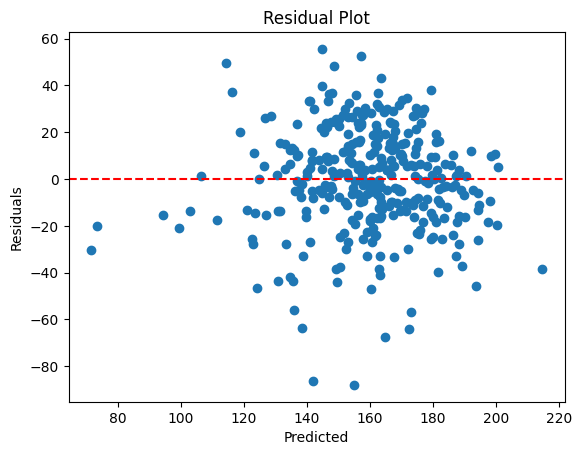

In [259]:
residuals_control = y_test_control - predictions_control
plt.scatter(predictions_control, residuals_control)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [17]:
mse = mean_squared_error(y_test_control, predictions_control)
r2 = r2_score(y_test_control, predictions_control)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 495.596019720962
R-squared: 0.4323569767628034


## Custom

In [71]:
# Logistic Regression

county = weather_yield_table_copy['County']
year = weather_yield_table_copy['Year']

X = weather_yield_table_copy.drop(columns=["County"], axis=1)

#y = weather_yield_table_copy['Value']


## Custom Train Test Split

In [72]:
X.columns

Index(['Year', 'DP10_4', 'DP10_5', 'DP10_6', 'DP10_7', 'DP10_8', 'DP10_9',
       'DP10_10', 'DT00_4', 'DT00_5', 'DT00_6', 'DT00_7', 'DT00_8', 'DT00_9',
       'DT00_10', 'DT32_4', 'DT32_5', 'DT32_6', 'DT32_7', 'DT32_8', 'DT32_9',
       'DT32_10', 'DX32_4', 'DX32_5', 'DX32_6', 'DX32_7', 'DX32_8', 'DX32_9',
       'DX32_10', 'DX90_4', 'DX90_5', 'DX90_6', 'DX90_7', 'DX90_8', 'DX90_9',
       'DX90_10', 'EMSD_4', 'EMSD_5', 'EMSD_6', 'EMSD_7', 'EMSD_8', 'EMSD_9',
       'EMSD_10', 'EMXP_4', 'EMXP_5', 'EMXP_6', 'EMXP_7', 'EMXP_8', 'EMXP_9',
       'EMXP_10', 'EMXT_4', 'EMXT_5', 'EMXT_6', 'EMXT_7', 'EMXT_8', 'EMXT_9',
       'EMXT_10', 'PRCP_4', 'PRCP_5', 'PRCP_6', 'PRCP_7', 'PRCP_8', 'PRCP_9',
       'PRCP_10', 'SNOW_4', 'SNOW_5', 'SNOW_6', 'SNOW_7', 'SNOW_8', 'SNOW_9',
       'SNOW_10', 'TAVG_4', 'TAVG_5', 'TAVG_6', 'TAVG_7', 'TAVG_8', 'TAVG_9',
       'TAVG_10', 'Value'],
      dtype='object')

In [73]:
X['Year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [111]:
def custon_train_test_split(X):
    # Assuming 'df' is your DataFrame
    training_years = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012 ,2013, 2014, 2015, 2016, 2017, 2018, 2019]
    testing_years = [2020, 2021, 2022]

    # Create a boolean mask for rows where the 'Year' column equals one of the selected years
    train_rows_bool = X['Year'].isin(training_years)
    test_rows_bool = X['Year'].isin(testing_years)


    train_rows = X[train_rows_bool].sample(frac=1, random_state=42) 
    test_rows = X[test_rows_bool]

    y_train = train_rows['Value']
    y_test = test_rows['Value']

    X_train = train_rows.drop(columns=["Year", 'Value'], axis=1)
    X_test = test_rows.drop(columns=["Year", 'Value'], axis=1)
    
    return X_train, X_test, y_train, y_test
    

In [112]:
X_train, X_test, y_train, y_test = custon_train_test_split(X)

In [113]:
X_train

,DP10_4,DP10_5,DP10_6,DP10_7,DP10_8,DP10_9,DP10_10,DT00_4,DT00_5,DT00_6,...,SNOW_8,SNOW_9,SNOW_10,TAVG_4,TAVG_5,TAVG_6,TAVG_7,TAVG_8,TAVG_9,TAVG_10
413,0.128334,0.884342,0.909517,0.980706,0.583505,0.792293,1.543733,0.0,0.0,0.0,...,0.0,0.0,0.0,8.172653e-01,-0.601398,-1.529293,3.539371e-01,3.548404e-01,-1.573676,-1.215259
316,0.563823,-1.735757,-1.334496,0.506879,1.969977,-0.971971,-1.293183,0.0,0.0,0.0,...,0.0,0.0,0.0,1.419758e+00,0.015860,1.402473,9.239093e-01,2.227386e+00,1.918698,1.457845
1034,0.854149,-1.361458,1.158852,0.190993,-0.225271,-0.200105,0.834504,0.0,0.0,0.0,...,0.0,0.0,0.0,-2.098480e-02,0.096372,0.452746,-2.115942e+00,-3.517806e-01,-1.237871,-0.486230
65,0.999312,1.071492,-1.521497,-1.151518,-0.802968,-0.310372,1.138459,0.0,0.0,0.0,...,0.0,0.0,0.0,2.179422e+00,0.042697,1.278595,1.810533e+00,2.192055e+00,2.388825,0.607312
1024,0.563823,-1.735757,-0.212489,-0.440777,-0.340810,-0.310372,1.003368,0.0,0.0,0.0,...,0.0,0.0,0.0,-7.544536e-01,-0.279350,-0.703443,-2.305933e+00,-9.170775e-01,-1.842320,-0.972249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.346078,-0.800008,1.283519,2.165275,-0.802968,-1.302770,0.226593,0.0,0.0,0.0,...,0.0,0.0,0.0,9.306446e-16,0.000000,0.000000,-4.499884e-15,2.510422e-15,0.000000,0.000000
1130,0.563823,-1.361458,2.031524,1.612476,-0.340810,-0.641171,-0.212453,0.0,0.0,0.0,...,0.0,0.0,0.0,9.220466e-01,1.116190,0.122406,-1.527048e-01,-9.170775e-01,0.508316,0.546560
1294,-0.161993,0.884342,0.086712,0.506879,0.198373,-0.593914,0.675289,0.0,0.0,0.0,...,0.0,0.0,0.0,7.386794e-01,-1.084470,-0.331811,-3.743606e-01,-1.694361e+00,-0.331197,0.759193
860,-1.178134,-1.922907,-2.643504,-1.388432,-0.109732,0.571760,0.125275,0.0,0.0,0.0,...,0.0,0.0,0.0,9.306446e-16,0.000000,0.000000,-4.499884e-15,2.510422e-15,0.000000,0.000000


In [114]:
y_train.shape

(1443,)

In [115]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [116]:
# Create a linear regression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [117]:
predictions = model.predict(X_test)

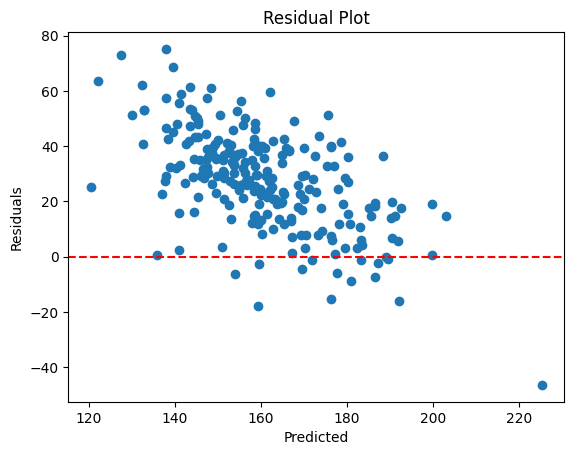

In [118]:
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

Expected Behavior: In a well-fitted regression model, the residuals should be randomly scattered around the horizontal line at 
y=0. 

This means that, on average, the model is equally likely to overestimate as it is to underestimate the actual values. There should be no discernible patterns or trends in the residuals.


## Observation:

- The spread of residuals changes indicate the variance is not constant.

In [119]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1084.6404238046898
R-squared: -3.7683092078663263


## Correlation Analysis

In [120]:
X.shape

(1677, 79)

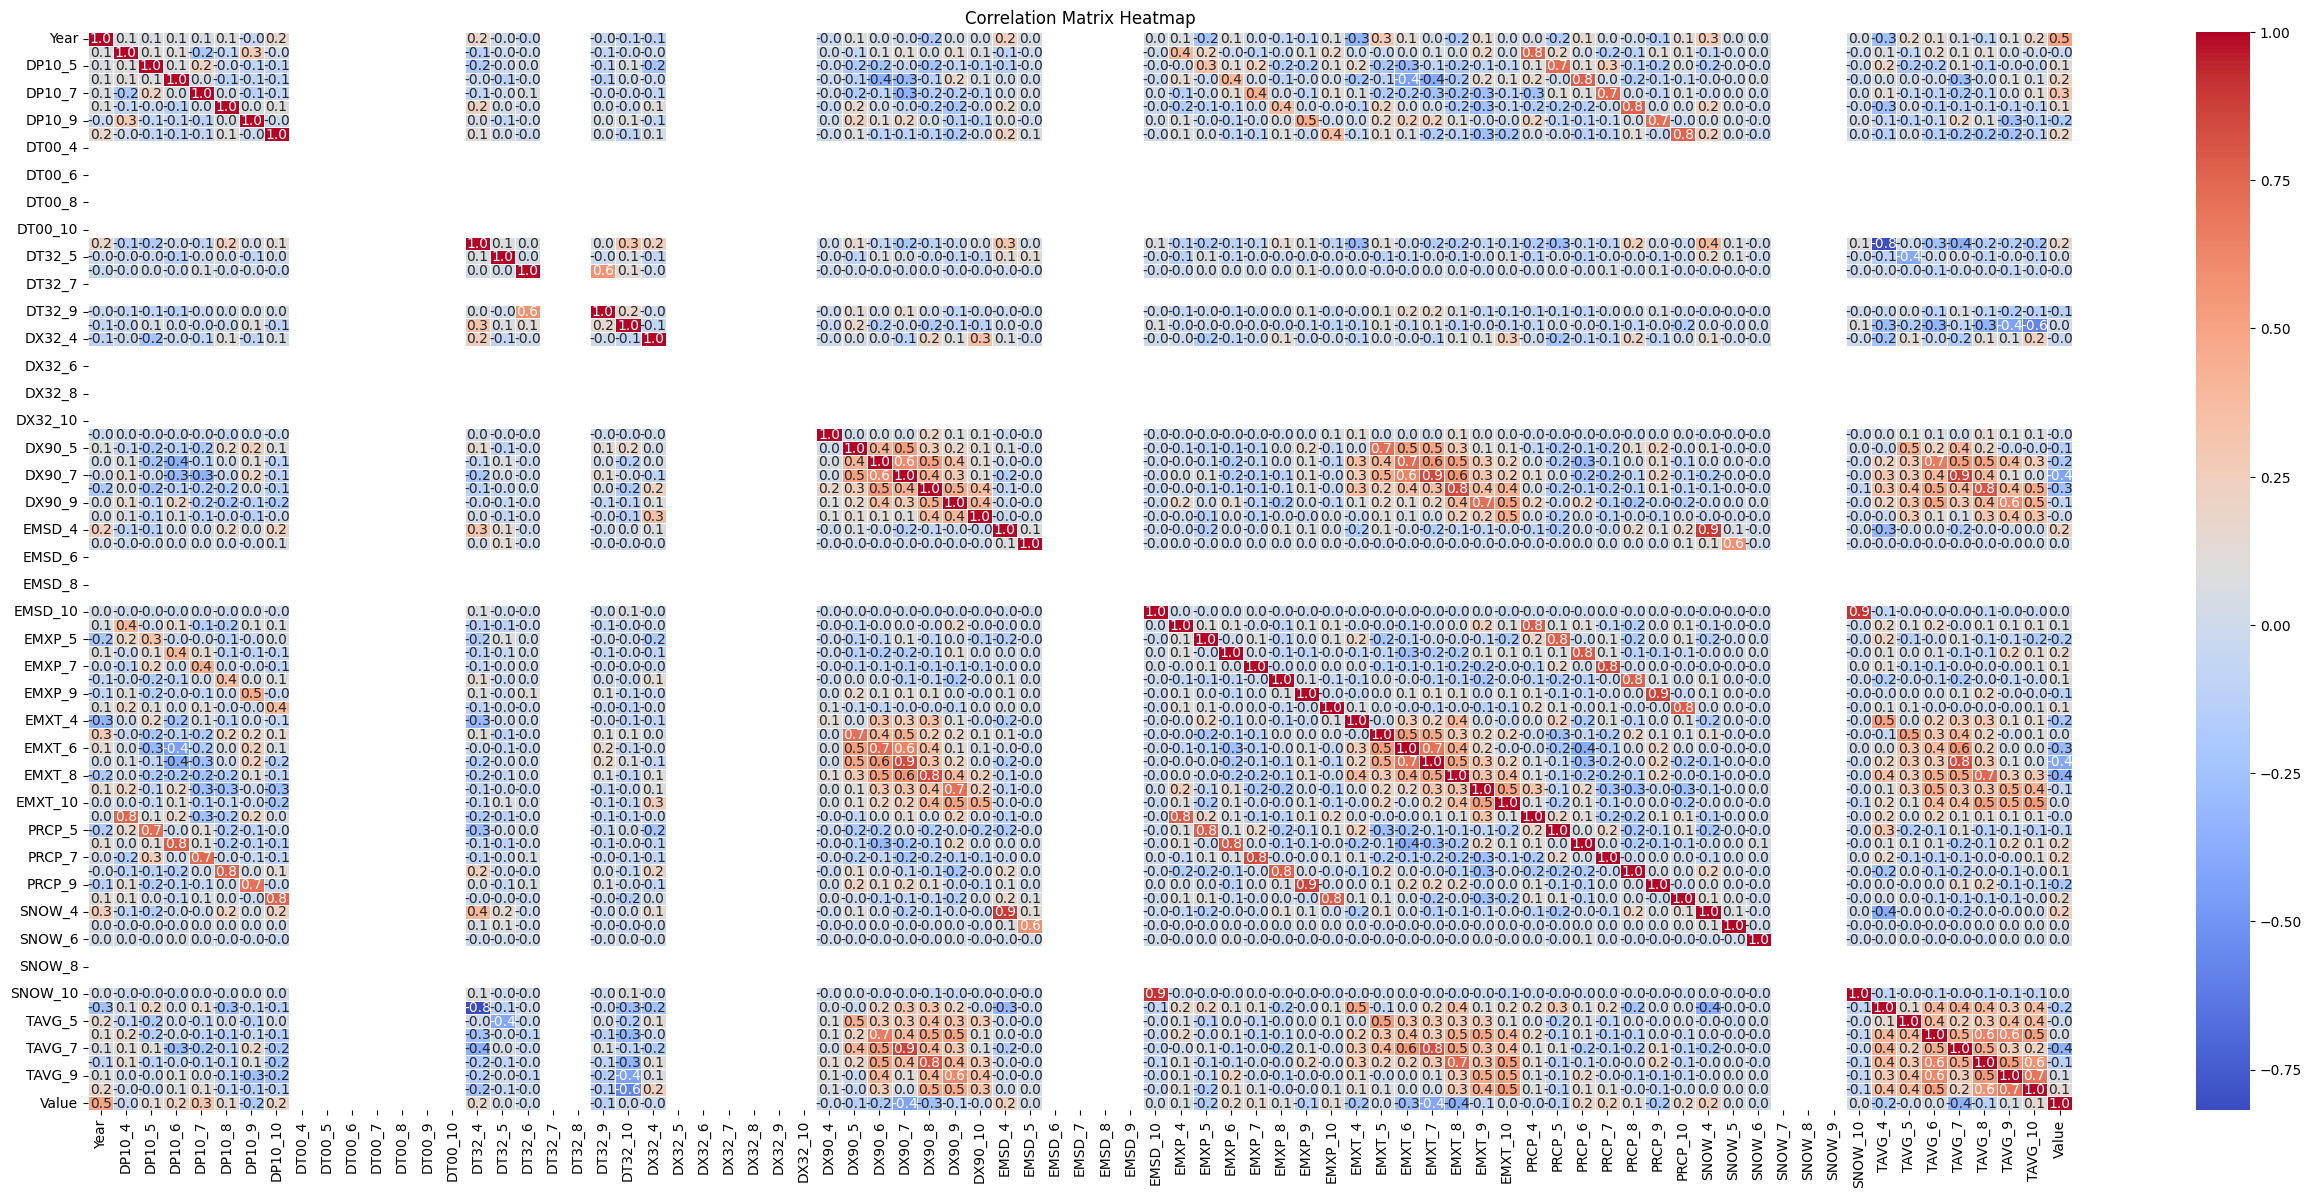

In [121]:
#group_selected_drop = group_selected.drop("DATE")


# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(32, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [122]:
# Assuming correlation_matrix is your correlation matrix
correlation_threshold = 0.7

# Iterate through the correlation matrix and print pairs with correlation above or below threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            print(f"Pair of features: {correlation_matrix.columns[i]}, {correlation_matrix.columns[j]}, Correlation: {correlation_matrix.iloc[i, j]}")


Pair of features: DP10_4, PRCP_4, Correlation: 0.7568677126579705
Pair of features: DP10_5, PRCP_5, Correlation: 0.7234272719247979
Pair of features: DP10_6, PRCP_6, Correlation: 0.7790396868103443
Pair of features: DP10_7, PRCP_7, Correlation: 0.7386277765206299
Pair of features: DP10_8, PRCP_8, Correlation: 0.7683060094358904
Pair of features: DP10_9, PRCP_9, Correlation: 0.7116371896214355
Pair of features: DP10_10, PRCP_10, Correlation: 0.7600344142330896
Pair of features: DT32_4, TAVG_4, Correlation: -0.8180621605824058
Pair of features: DX90_5, EMXT_5, Correlation: 0.721446265685474
Pair of features: DX90_6, EMXT_6, Correlation: 0.737033389626899
Pair of features: DX90_7, EMXT_7, Correlation: 0.8506208279779618
Pair of features: DX90_7, TAVG_7, Correlation: 0.8698446930860916
Pair of features: DX90_8, EMXT_8, Correlation: 0.8371213542683427
Pair of features: DX90_8, TAVG_8, Correlation: 0.8047295462817552
Pair of features: DX90_9, EMXT_9, Correlation: 0.720425424910115
Pair of fe

In [123]:
to_drop = ['DP10_4', 'DP10_5', 'DP10_6', 'DP10_7', 'DP10_8', 'DP10_9', 'DP10_10', 'DT32_4', 'DX90_5', 'DX90_6', 'DX90_7', 'DX90_8', 'DX90_9',
           'EMSD_4', 'EMSD_10', 'EMXP_4', 'EMXP_5', 'EMXP_6', 'EMXP_7', 'EMXP_8', 'EMXP_9', 'EMXP_10', 'EMXT_7', 'EMXT_8', "County"]

In [124]:
X_v2 = weather_yield_table_copy.drop(columns=to_drop, axis=1)

In [125]:
X_v2_train, X_v2_test, y_v2_train, y_v2_test = custon_train_test_split(X_v2)

In [126]:
X_v2_train.columns

Index(['DT00_4', 'DT00_5', 'DT00_6', 'DT00_7', 'DT00_8', 'DT00_9', 'DT00_10',
       'DT32_5', 'DT32_6', 'DT32_7', 'DT32_8', 'DT32_9', 'DT32_10', 'DX32_4',
       'DX32_5', 'DX32_6', 'DX32_7', 'DX32_8', 'DX32_9', 'DX32_10', 'DX90_4',
       'DX90_10', 'EMSD_5', 'EMSD_6', 'EMSD_7', 'EMSD_8', 'EMSD_9', 'EMXT_4',
       'EMXT_5', 'EMXT_6', 'EMXT_9', 'EMXT_10', 'PRCP_4', 'PRCP_5', 'PRCP_6',
       'PRCP_7', 'PRCP_8', 'PRCP_9', 'PRCP_10', 'SNOW_4', 'SNOW_5', 'SNOW_6',
       'SNOW_7', 'SNOW_8', 'SNOW_9', 'SNOW_10', 'TAVG_4', 'TAVG_5', 'TAVG_6',
       'TAVG_7', 'TAVG_8', 'TAVG_9', 'TAVG_10'],
      dtype='object')

In [127]:
model_linear = LinearRegression()
model_linear.fit(X_v2_train, y_v2_train)

LinearRegression()

In [128]:
predictions_linear = model_linear.predict(X_v2_test)

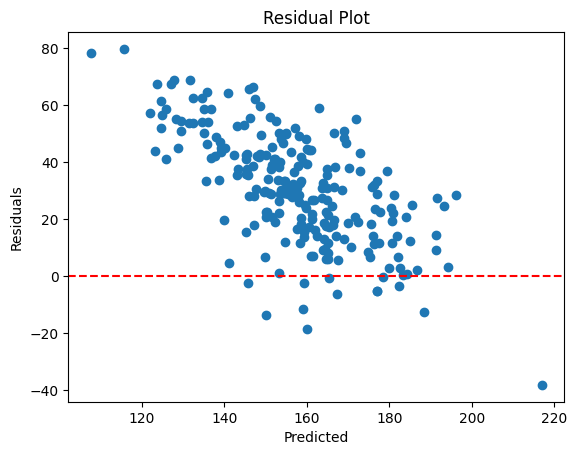

In [129]:
residuals_linear = y_v2_test - predictions_linear
plt.scatter(predictions_linear, residuals_linear)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [130]:
mse = mean_squared_error(y_v2_test, predictions_linear)
r2 = r2_score(y_v2_test, predictions_linear)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1324.7624413727606
R-squared: -4.82393649434062


## Random Forest

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

In [132]:
X.columns

Index(['Year', 'DP10_4', 'DP10_5', 'DP10_6', 'DP10_7', 'DP10_8', 'DP10_9',
       'DP10_10', 'DT00_4', 'DT00_5', 'DT00_6', 'DT00_7', 'DT00_8', 'DT00_9',
       'DT00_10', 'DT32_4', 'DT32_5', 'DT32_6', 'DT32_7', 'DT32_8', 'DT32_9',
       'DT32_10', 'DX32_4', 'DX32_5', 'DX32_6', 'DX32_7', 'DX32_8', 'DX32_9',
       'DX32_10', 'DX90_4', 'DX90_5', 'DX90_6', 'DX90_7', 'DX90_8', 'DX90_9',
       'DX90_10', 'EMSD_4', 'EMSD_5', 'EMSD_6', 'EMSD_7', 'EMSD_8', 'EMSD_9',
       'EMSD_10', 'EMXP_4', 'EMXP_5', 'EMXP_6', 'EMXP_7', 'EMXP_8', 'EMXP_9',
       'EMXP_10', 'EMXT_4', 'EMXT_5', 'EMXT_6', 'EMXT_7', 'EMXT_8', 'EMXT_9',
       'EMXT_10', 'PRCP_4', 'PRCP_5', 'PRCP_6', 'PRCP_7', 'PRCP_8', 'PRCP_9',
       'PRCP_10', 'SNOW_4', 'SNOW_5', 'SNOW_6', 'SNOW_7', 'SNOW_8', 'SNOW_9',
       'SNOW_10', 'TAVG_4', 'TAVG_5', 'TAVG_6', 'TAVG_7', 'TAVG_8', 'TAVG_9',
       'TAVG_10', 'Value'],
      dtype='object')

In [135]:
#X_rf_train, X_rf_test, y_rf_train, y_rf_test = custon_train_test_split(X)

In [136]:
#X_rf_train.shape

(1443, 77)

In [137]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_control, y_control, test_size=0.2, random_state=24)

In [138]:
X_rf_train.shape

(1341, 77)

In [139]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split a node
}

# Create the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


# Perform the grid search
grid_search.fit(X_rf_train, y_rf_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Since scoring is negative mean squared error

print("Best Parameters:", best_params)
print("Best RMSE:", np.sqrt(best_score))

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Make predictions on the testing set using the best estimator
best_predictions = best_rf_model.predict(X_rf_test)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 17.28024362170689


In [148]:
X_rf_train.shape

(1341, 77)

In [149]:
X_rf_train

,DP10_4,DP10_5,DP10_6,DP10_7,DP10_8,DP10_9,DP10_10,DT00_4,DT00_5,DT00_6,...,SNOW_8,SNOW_9,SNOW_10,TAVG_4,TAVG_5,TAVG_6,TAVG_7,TAVG_8,TAVG_9,TAVG_10
835,2.741268,0.135742,0.255013,-1.704317,-0.340810,2.115491,-0.752818,0.0,0.0,0.0,...,0.0,0.0,0.0,9.306446e-16,0.000000,0.000000,-4.499884e-15,2.510422e-15,0.000000,0.000000
974,0.019461,-1.361458,0.385914,-0.251246,-0.918507,0.682027,0.463003,0.0,0.0,0.0,...,0.0,0.0,51.0,-8.592349e-01,0.311070,-0.455689,-1.039328e+00,-1.411712e+00,-0.499099,-0.303973
627,1.217056,0.697192,-0.212489,1.217620,-0.109732,1.012826,1.341096,0.0,0.0,0.0,...,0.0,0.0,0.0,4.505309e-01,0.633118,1.567643,-9.126677e-01,2.841783e-01,0.407575,-0.789992
103,-0.742645,2.007241,-1.334496,-0.914604,-1.265125,0.792293,0.733186,0.0,0.0,0.0,...,0.0,0.0,0.0,1.393562e+00,0.418420,-0.538273,1.113900e+00,2.121393e+00,0.038189,0.911074
1281,-0.960389,1.321025,-0.062889,0.585850,-0.725942,-0.795544,0.571076,0.0,0.0,0.0,...,0.0,0.0,0.0,9.744372e-01,-0.869771,-1.446708,-9.759979e-01,-1.694361e+00,-0.096133,0.911074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,0.128334,1.258642,0.909517,-0.677691,0.121347,-1.413037,-0.077362,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.781567e-01,0.096372,-0.951198,6.072581e-01,1.529904e-03,1.650054,0.850322
343,-1.178134,0.884342,-0.586492,-0.203863,0.121347,1.453892,0.733186,0.0,0.0,0.0,...,0.0,0.0,0.0,9.306446e-16,0.000000,0.000000,-4.499884e-15,2.510422e-15,0.000000,0.000000
192,-0.089411,1.258642,-1.147495,0.980706,0.121347,-2.074636,0.530549,0.0,0.0,0.0,...,0.0,0.0,0.0,9.306446e-16,0.000000,0.000000,-4.499884e-15,2.510422e-15,0.000000,0.000000
899,-1.323297,-1.735757,-1.459163,0.190993,0.275400,0.057183,1.813916,0.0,0.0,0.0,...,0.0,0.0,0.0,-4.401099e-01,1.116190,-0.579566,1.303891e+00,-9.170775e-01,-1.405773,-1.488644


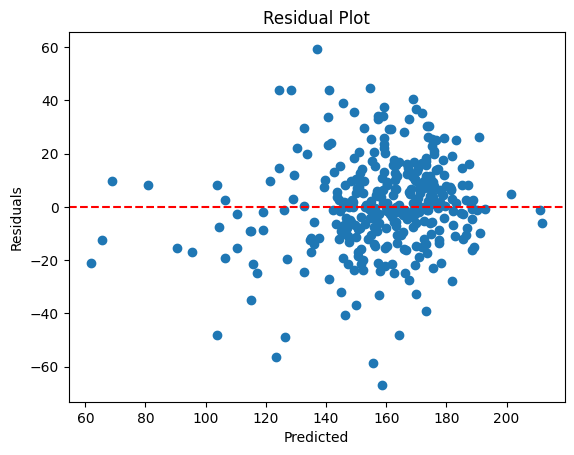

In [140]:
residuals_rf = y_rf_test - best_predictions
plt.scatter(best_predictions, residuals_rf)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [141]:
mse = mean_squared_error(y_rf_test , best_predictions)
r2 = r2_score(y_rf_test, best_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 310.54929665828934
R-squared: 0.6443047671800333


## Feature importance with Random Forest

In [164]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Access feature importances
feature_importances = best_estimator.feature_importances_

# Print feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")

Feature 0: 0.010483959546386657
Feature 1: 0.018083908460530002
Feature 2: 0.056214003154633624
Feature 3: 0.11755498169634311
Feature 4: 0.013905667700061892
Feature 5: 0.014203446768529882
Feature 6: 0.08853984895733213
Feature 7: 0.007048560671190018
Feature 8: 0.0024583704095281758
Feature 9: 1.6119905464151691e-09
Feature 10: 5.2512899241261174e-05
Feature 11: 0.004489946107774477
Feature 12: 0.000919323786669687
Feature 13: 5.3964175068830084e-06
Feature 14: 0.0022166165752292343
Feature 15: 0.003756979708523057
Feature 16: 0.017767851540126865
Feature 17: 0.008347144150038628
Feature 18: 0.005846429309864101
Feature 19: 0.0005848249762976672
Feature 20: 0.014472181828543682
Feature 21: 4.888307172943197e-07
Feature 22: 1.8691578279539656e-06
Feature 23: 0.01275988091287964
Feature 24: 0.02942744965242872
Feature 25: 0.0138447327476295
Feature 26: 0.010867013332059479
Feature 27: 0.012822795770319625
Feature 28: 0.01291119323657464
Feature 29: 0.013203021421258473
Feature 30: 0.0

In [ ]:
# 8-14, 18, 19, 23-28, 38-41, 67-69

In [204]:
X_control_rf = X_control.copy()
y_control_rf = y_control.copy()

In [205]:
index_to_drop = [7, 8, 9, 10, 11, 12, 13, 17, 18, 22, 23, 24, 25, 26, 27, 37, 38, 39, 40, 66, 67, 68]

In [206]:
X_control_rf.drop(X_control_rf.columns[index_to_drop], axis=1, inplace=True)

In [207]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_control_rf, y_control_rf, test_size=0.2, random_state=24)

In [208]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split a node
}

# Create the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


# Perform the grid search
grid_search.fit(X_rf_train, y_rf_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Since scoring is negative mean squared error

print("Best Parameters:", best_params)
print("Best RMSE:", np.sqrt(best_score))

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Make predictions on the testing set using the best estimator
best_predictions = best_rf_model.predict(X_rf_test)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 17.30420000503499


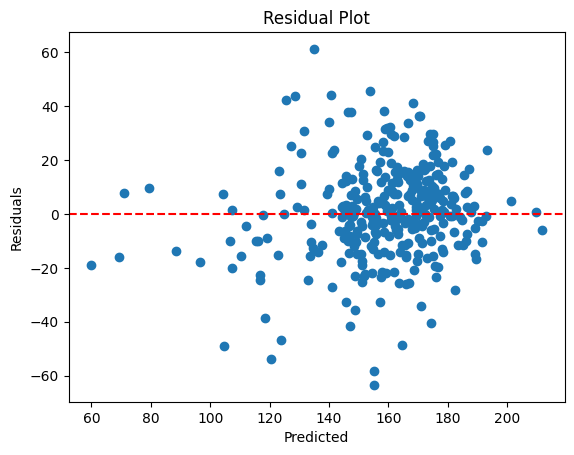

In [214]:
residuals_rf = y_rf_test - best_predictions
plt.scatter(best_predictions, residuals_rf)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [215]:
mse = mean_squared_error(y_rf_test , best_predictions)
r2 = r2_score(y_rf_test, best_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 311.8924690167056
R-squared: 0.6427663318659456


In [217]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Access feature importances
feature_importances = best_estimator.feature_importances_

# Print feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")

Feature 0: 0.010483959546386657
Feature 1: 0.018083908460530002
Feature 2: 0.056214003154633624
Feature 3: 0.11755498169634311
Feature 4: 0.013905667700061892
Feature 5: 0.014203446768529882
Feature 6: 0.08853984895733213
Feature 7: 0.007048560671190018
Feature 8: 0.0024583704095281758
Feature 9: 1.6119905464151691e-09
Feature 10: 5.2512899241261174e-05
Feature 11: 0.004489946107774477
Feature 12: 0.000919323786669687
Feature 13: 5.3964175068830084e-06
Feature 14: 0.0022166165752292343
Feature 15: 0.003756979708523057
Feature 16: 0.017767851540126865
Feature 17: 0.008347144150038628
Feature 18: 0.005846429309864101
Feature 19: 0.0005848249762976672
Feature 20: 0.014472181828543682
Feature 21: 4.888307172943197e-07
Feature 22: 1.8691578279539656e-06
Feature 23: 0.01275988091287964
Feature 24: 0.02942744965242872
Feature 25: 0.0138447327476295
Feature 26: 0.010867013332059479
Feature 27: 0.012822795770319625
Feature 28: 0.01291119323657464
Feature 29: 0.013203021421258473
Feature 30: 0.0

In [218]:
original_cols = list(X_rf_train.columns).copy()

In [229]:
high = []
mid = []
low = []


for i, importance in enumerate(feature_importances):
    if importance > 0.05:
        high.append(i) 
           
    elif importance <= 0.05 and importance >= 0.005:
        mid.append(i)
        
    else:
        low.append(i)
    

#col_lst = list(X_rf_train.columns)

high_features = [original_cols[i] for i in high]
mid_features = [original_cols[i] for i in mid]
low_features = [original_cols[i] for i in low]

'''
High Importance Features: 


'''

'\nHigh Importance Features: \n\n\n'

In [230]:
high_features

['DP10_6', 'DP10_7', 'DP10_10', 'EMXT_6', 'PRCP_6']

In [231]:
mid_features

['DP10_4',
 'DP10_5',
 'DP10_8',
 'DP10_9',
 'DT32_4',
 'DX90_7',
 'DX90_8',
 'DX90_9',
 'EMSD_4',
 'EMXP_4',
 'EMXP_5',
 'EMXP_6',
 'EMXP_7',
 'EMXP_8',
 'EMXP_9',
 'EMXP_10',
 'EMXT_4',
 'EMXT_5',
 'EMXT_7',
 'EMXT_8',
 'EMXT_9',
 'EMXT_10',
 'PRCP_4',
 'PRCP_5',
 'PRCP_7',
 'PRCP_8',
 'PRCP_9',
 'PRCP_10',
 'SNOW_4',
 'TAVG_4',
 'TAVG_5',
 'TAVG_6',
 'TAVG_7',
 'TAVG_8',
 'TAVG_9',
 'TAVG_10']

In [232]:
low_features

['DT32_5',
 'DT32_6',
 'DT32_9',
 'DT32_10',
 'DX32_4',
 'DX90_4',
 'DX90_5',
 'DX90_6',
 'DX90_10',
 'EMSD_5',
 'EMSD_10',
 'SNOW_5',
 'SNOW_6',
 'SNOW_10']

In [246]:
X_control_rf_v2 = X_control_rf.copy()
y_control_rf_v2 = y_control_rf.copy()

In [247]:
X_control_rf_v2.drop(columns=low_features, axis=1, inplace=True)

In [248]:
#X_control_rf_v2.drop(columns=mid_features, axis=1, inplace=True)

In [249]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_control_rf_v2, y_control_rf_v2, test_size=0.2, random_state=24)

In [250]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split a node
}

# Create the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


# Perform the grid search
grid_search_rf.fit(X_rf_train, y_rf_train)

# Get the best parameters and best score
best_params = grid_search_rf.best_params_
best_score = -grid_search_rf.best_score_  # Since scoring is negative mean squared error

print("Best Parameters:", best_params)
print("Best RMSE:", np.sqrt(best_score))

# Get the best estimator
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the testing set using the best estimator
best_predictions = best_rf_model.predict(X_rf_test)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 17.278257269002392


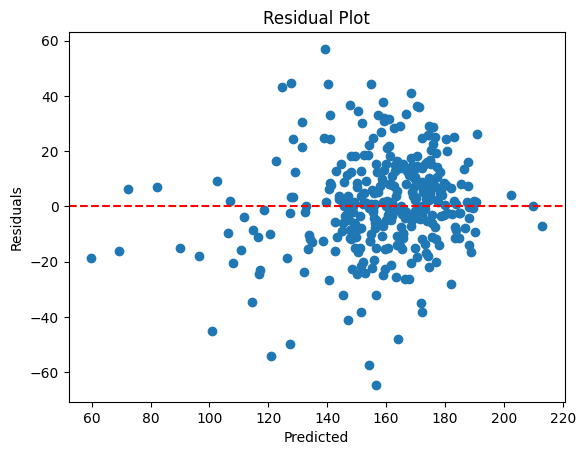

In [251]:
residuals_rf = y_rf_test - best_predictions
plt.scatter(best_predictions, residuals_rf)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [252]:
mse = mean_squared_error(y_rf_test , best_predictions)
r2 = r2_score(y_rf_test, best_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 308.61800781249997
R-squared: 0.6465168160979915


## L1 Regularization

In [297]:
from sklearn.linear_model import Lasso

In [299]:
y_l1 = weather_yield_table_copy['Value']
X_l1 = weather_yield_table_copy.drop(columns=["County", "Year", "Value"], axis=1)

In [300]:
X_train_l1, X_test_l1, y_train_l1, y_test_l1 = train_test_split(X_l1, y_l1, test_size=0.2, random_state=24)

In [302]:
# Create a Lasso regression model
lasso_model = Lasso(alpha=1.0)  # Set alpha to control regularization strength

# Fit the model to your training data
lasso_model.fit(X_train_l1, y_train_l1)

# Predict on test data
pred_lasso = lasso_model.predict(X_test_l1)

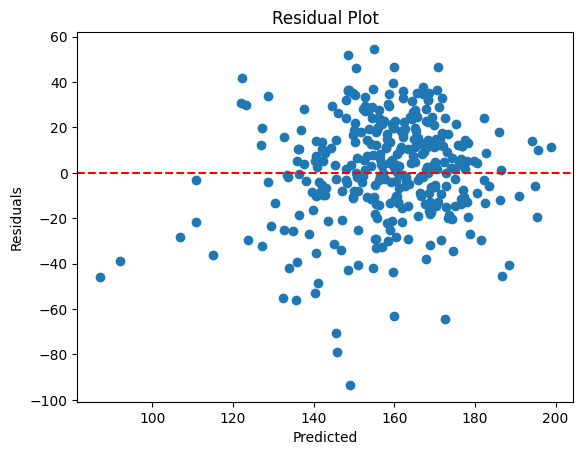

In [303]:
residuals_lasso = y_test_l1 - pred_lasso
plt.scatter(pred_lasso , residuals_lasso )
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [304]:
mse = mean_squared_error(y_test_l1,  pred_lasso)
r2 = r2_score(y_test_l1,  pred_lasso)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 526.1986709896462
R-squared: 0.3973054816054973


## L2 Regularization

In [285]:
y_l2 = weather_yield_table_copy['Value']
X_l2 = weather_yield_table_copy.drop(columns=["County", "Year", "Value"], axis=1)

In [286]:
X_train_l2, X_test_l2, y_train_l2, y_test_l2 = train_test_split(X_l2, y_l2 , test_size=0.2, random_state=24)

In [294]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.5)  # Set alpha to control regularization strength

# Fit the model to your training data
ridge_model.fit(X_train_l2, y_train_l2)

# Predict on test data
pred_ridge  = ridge_model.predict(X_test_l2)

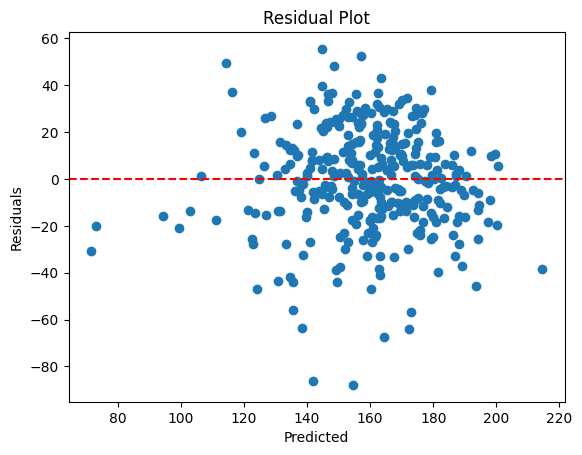

In [295]:
residuals_ridge = y_test_l2 - pred_ridge 
plt.scatter(pred_ridge , residuals_ridge)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [296]:
mse = mean_squared_error(y_test_l2,  pred_ridge)
r2 = r2_score(y_test_l2,  pred_ridge)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 493.6507592085783
R-squared: 0.434585028470836


## KNN 

In [319]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor

In [306]:
y_knn = weather_yield_table_copy['Value']
X_knn  = weather_yield_table_copy.drop(columns=["County", "Year", "Value"], axis=1)

In [307]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn , test_size=0.2, random_state=24)

In [309]:
y_train_knn.describe()

count    1341.000000
mean      159.004922
std        29.465367
min        30.100000
25%       144.500000
50%       161.200000
75%       179.300000
max       227.000000
Name: Value, dtype: float64

In [310]:
y_test_knn.describe()

count    336.000000
mean     159.460417
std       29.591943
min       41.000000
25%      145.375000
50%      162.700000
75%      180.425000
max      217.200000
Name: Value, dtype: float64

In [315]:
X_train_knn.shape

(1341, 77)

In [394]:
pca = PCA(n_components=41)  # Set the number of components to reduce to
X_train_pca = pca.fit_transform(X_train_knn, y_train_knn)
X_test_pca = pca.transform(X_test_knn)

In [395]:

knn_regressor = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [5, 10, 15, 20, 30], # Number of neighbors
}


In [396]:
grid_search_knn = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train_pca, y_train_knn)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [5, 10, 15, 20, 30]},
             scoring='neg_mean_squared_error')

In [397]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [398]:
# Make predictions on the testing data using the best model
best_model = grid_search_knn.best_estimator_
pred_knn = best_model.predict(X_test_pca)

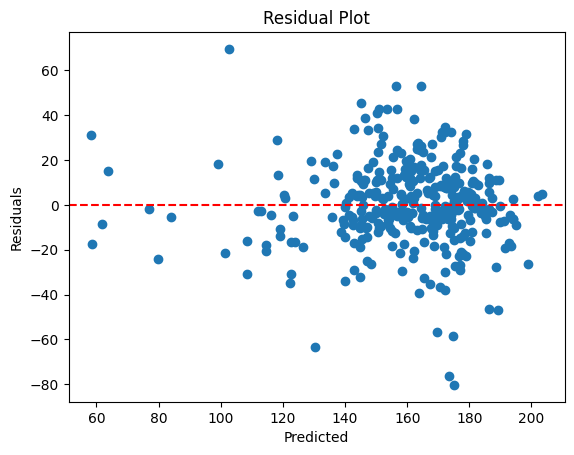

In [399]:
residuals_knn = y_test_knn - pred_knn
plt.scatter(pred_knn , residuals_knn)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.title('Residual Plot')
plt.show()

In [400]:
mse = mean_squared_error(y_test_knn , pred_knn)
r2 = r2_score(y_test_knn,  pred_knn)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 368.62904761904764
R-squared: 0.5777817038132396


## SVM